In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Load the data in a dataframe
file_path = 'C:/Users/Ευάγγελος Καρδάτος/Desktop/Master/II_Semester/Ποσοτική Ανάλυση Γλωσσικών Δεδομένων/Assingment/1/Multiple Text Project 1 - Results.csv' #it could be the fullpath
df = pd.read_csv(file_path, encoding='UTF-8', delimiter='\t')

# Drop the useless columns
df.drop(' ', inplace=True, axis=1)
df.drop('Text', inplace=True, axis=1)
df.drop('Types', inplace=True, axis=1)
df.drop('Tokens', inplace=True, axis=1)
df.drop('Frequencies', inplace=True, axis=1)
df.drop('h-Point', inplace=True, axis=1)
df.drop('R1', inplace=True, axis=1)
df.drop('Λ (Lambda)', inplace=True, axis=1)
df.drop('Unnamed: 11', inplace=True, axis=1)

# Convert to float the useful columns
df['TTR'] = df['TTR'].str.replace(',','.')
df = df.astype({'TTR': float}, errors='raise')
df['Entropy'] = df['Entropy'].str.replace(',','.')
df = df.astype({'Entropy': float}, errors='raise')
df['Average Tokens Length'] = df['Average Tokens Length'].str.replace(',','.')
df = df.astype({'Average Tokens Length': float}, errors='raise')

#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TTR                    32 non-null     float64
 1   Entropy                32 non-null     float64
 2   Average Tokens Length  32 non-null     float64
dtypes: float64(3)
memory usage: 896.0 bytes


# Confidence Interval

I chose the T-distribution because the population of standard deviation is not known. In addition, the t-distribution most often is used in order to construct confidence intervals. Also, due to the fact that the population of the samples were more than 30, there is not a difference  the Normal-distribution

In [3]:
#1
# Import libraries
from scipy.stats import ttest_1samp


#Calculating confidence interval for TTR considering population's std unknown as it happens! So we use s. Note we use t distribution
print("95% T distr. confidence interval", st.t.interval(alpha=0.95, df=len(df['TTR'])-1, loc=np.mean(df['TTR']), scale=st.sem(df['TTR'])))

#Calculating confidence interval for Entropy considering population's std unknown as it happens! So we use s. Note we use t distribution
print("95% T distr. confidence interval", st.t.interval(alpha=0.95, df=len(df['Entropy'])-1, loc=np.mean(df['Entropy']), scale=st.sem(df['Entropy'])))

#Calculating confidence interval for Average Tokens Length considering population's std unknown as it happens! So we use s. Note we use t distribution
print("95% T distr. confidence interval", st.t.interval(alpha=0.95, df=len(df['Average Tokens Length'])-1, loc=np.mean(df['Average Tokens Length']), scale=st.sem(df['Average Tokens Length'])))

95% T distr. confidence interval (0.47981737172944255, 0.5021022532705575)
95% T distr. confidence interval (7.941813341499512, 8.068507221000488)
95% T distr. confidence interval (4.83463419054585, 4.953669371954153)


# T-TEST FOR TTR

32
dof: 31


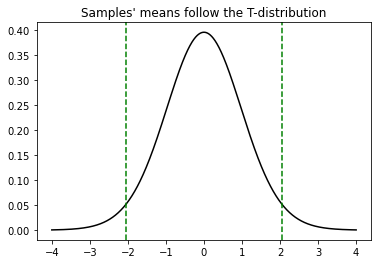

In [4]:
# 2
# TTR

feature = 'TTR'
print(len(df[feature]))          #IT IS NUMERIC, AND SAMPLE SIZE IS > 30, SO oneSample t-test to be used

alpha = 0.05
print("dof:",len(df[feature])-1)
t_crit = 2.039
dof = len(df[feature])-1
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.title("Samples' means follow the T-distribution")
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--') 

32
t-statistic: 0.17568417369935
P Value:  0.8616846543837902
cannot reject H0
cannot reject H0


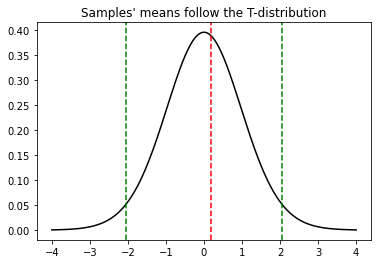

In [5]:
# Cannot Reject
# TTR

#HO: μ = h0value
#H1: μ <> h0value
feature = 'TTR'
print(len(df[feature]))              

h0value = 0.49
    
tscore, pvalue = ttest_1samp(df[feature], popmean=h0value)
print("t-statistic:", tscore)
print("P Value: ", pvalue)

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")
    
if (abs(t_crit)<abs(tscore)):
    print("can reject H0")
else:
    print("cannot reject H0")
    
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')
plt.title("Samples' means follow the T-distribution")
plt.show()

32
t-statistic: -3.4851177787518206
P Value:  0.0014913209242096808
can reject H0
can reject H0


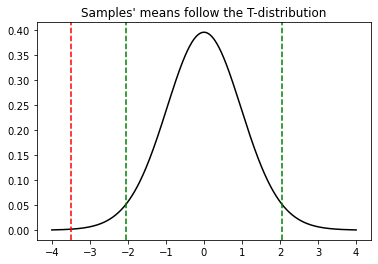

In [6]:
# REJECT

# ΤΤR

#HO: μ = h0value
#H1: μ <> h0value
feature = 'TTR'
print(len(df[feature]))              

h0value = 0.51 
    
tscore, pvalue = ttest_1samp(df[feature], popmean=h0value)
print("t-statistic:", tscore)
print("P Value: ", pvalue)

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")
    
if (abs(t_crit)<abs(tscore)):
    print("can reject H0")
else:
    print("cannot reject H0")
    
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')
plt.title("Samples' means follow the T-distribution")
plt.show()

# T-TEST FOR ENTROPY

32
dof: 31


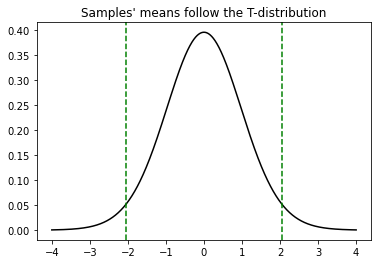

In [7]:
# 2
# Entropy

feature = 'Entropy'
print(len(df[feature]))          #IT IS NUMERIC, AND SAMPLE SIZE IS > 30, SO oneSample t-test to be used

alpha = 0.05
print("dof:",len(df[feature])-1)
t_crit = 2.039
dof = len(df[feature])-1
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.title("Samples' means follow the T-distribution")
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')

32
t-statistic: 0.1661400383035856
P Value:  0.8691256085658056
cannot reject H0
cannot reject H0


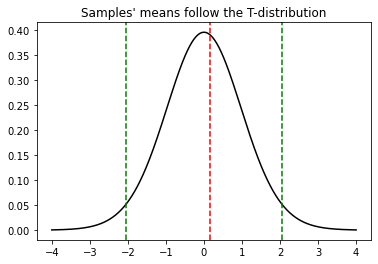

In [8]:
# Cannot Reject
# Entropy


#HO: μ = h0value
#H1: μ <> h0value
feature = 'Entropy'
print(len(df[feature]))              

h0value = 8 
    
tscore, pvalue = ttest_1samp(df[feature], popmean=h0value)
print("t-statistic:", tscore)
print("P Value: ", pvalue)

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")
    
if (abs(t_crit)<abs(tscore)):
    print("can reject H0")
else:
    print("cannot reject H0")
    
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')
plt.title("Samples' means follow the T-distribution")
plt.show()

32
t-statistic: -3.697371198885798
P Value:  0.0008405304675396777
can reject H0
can reject H0


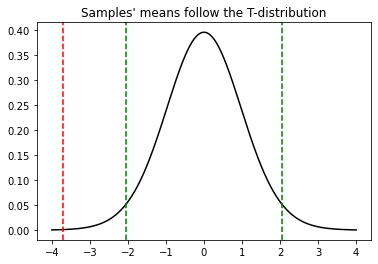

In [9]:
# REJECT
# Entropy

#HO: μ = h0value
#H1: μ <> h0value
feature = 'Entropy'
print(len(df[feature]))              

h0value = 8.12 #9.7 , 10.9
    
tscore, pvalue = ttest_1samp(df[feature], popmean=h0value)
print("t-statistic:", tscore)
print("P Value: ", pvalue)

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")
    
if (abs(t_crit)<abs(tscore)):
    print("can reject H0")
else:
    print("cannot reject H0")
    
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')
plt.title("Samples' means follow the T-distribution")
plt.show()

# T-TEST FOR A.T.L.

32
dof: 31


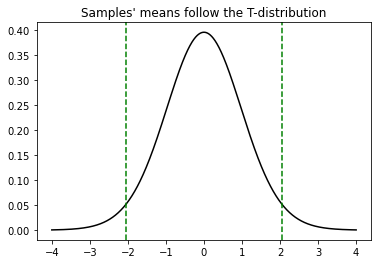

In [10]:
# 2
# Average Tokens Length


feature = 'Average Tokens Length'
print(len(df[feature]))          #IT IS NUMERIC, AND SAMPLE SIZE IS > 30, SO oneSample t-test to be used

alpha = 0.05
print("dof:",len(df[feature])-1)
t_crit = 2.039
dof = len(df[feature])-1
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.title("Samples' means follow the T-distribution")
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')

32
t-statistic: 0.14227077382826048
P Value:  0.8877867771834598
cannot reject H0
cannot reject H0


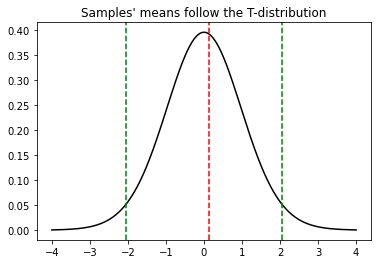

In [11]:
# Cannot Reject
# Average Tokens Length

#HO: μ = h0value
#H1: μ <> h0value
feature = 'Average Tokens Length'
print(len(df[feature]))              

h0value = 4.89 #9.7 , 10.9
    
tscore, pvalue = ttest_1samp(df[feature], popmean=h0value)
print("t-statistic:", tscore)
print("P Value: ", pvalue)

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")
    
if (abs(t_crit)<abs(tscore)):
    print("can reject H0")
else:
    print("cannot reject H0")
    
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')
plt.title("Samples' means follow the T-distribution")
plt.show()

32
t-statistic: -3.6271438891203696
P Value:  0.001017256882136167
can reject H0
can reject H0


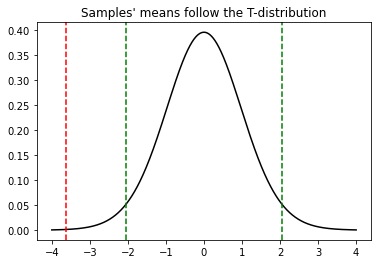

In [12]:
# REJECT
# Average Tokens Length

#HO: μ = h0value
#H1: μ <> h0value
feature = 'Average Tokens Length'
print(len(df[feature]))              

h0value = 5 #9.7 , 10.9
    
tscore, pvalue = ttest_1samp(df[feature], popmean=h0value)
print("t-statistic:", tscore)
print("P Value: ", pvalue)

if pvalue < alpha:
    print("can reject H0")
else:
    print("cannot reject H0")
    
if (abs(t_crit)<abs(tscore)):
    print("can reject H0")
else:
    print("cannot reject H0")
    
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k')
plt.axvline(x=tscore, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')   
plt.axvline(x=-t_crit, color='g', linestyle= '--')
plt.title("Samples' means follow the T-distribution")
plt.show()

In [17]:
# 3
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Load the data in a dataframe
file_path_second = 'C:/Users/Ευάγγελος Καρδάτος/Desktop/Multiple-Text-Project-1-Results.csv' #it could be the fullpath
df_second = pd.read_csv(file_path_second, encoding='UTF-8', delimiter='\t')

# Drop the useless columns
df_second.drop(' ', inplace=True, axis=1)
df_second.drop('Text', inplace=True, axis=1)
df_second.drop('Types', inplace=True, axis=1)
df_second.drop('Tokens', inplace=True, axis=1)
df_second.drop('Frequencies', inplace=True, axis=1)
df_second.drop('h-Point', inplace=True, axis=1)
df_second.drop('R1', inplace=True, axis=1)
df_second.drop('Λ (Lambda)', inplace=True, axis=1)
df_second.drop('Unnamed: 11', inplace=True, axis=1)

# Convert to float the useful columns
df_second['TTR'] = df_second['TTR'].str.replace(',','.')
df_second = df_second.astype({'TTR': float}, errors='raise')
df_second['Entropy'] = df_second['Entropy'].str.replace(',','.')
df_second = df_second.astype({'Entropy': float}, errors='raise')
df_second['Average Tokens Length'] = df_second['Average Tokens Length'].str.replace(',','.')
df_second = df_second.astype({'Average Tokens Length': float}, errors='raise')

#Information
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TTR                    58 non-null     float64
 1   Entropy                58 non-null     float64
 2   Average Tokens Length  58 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


# Two independent samples (parametric)

Based on numeric data and sample size is greater than 30. SoAssumptions are "valid".

In [18]:
from scipy.stats import ttest_ind
#Assume

#Consider them independent

levels1_scores_TTR = df['TTR'][0:31].to_numpy()  
levels2_scores_TTR = df_second['TTR'][0:58].to_numpy() #Note that ttest_ind examines for equal mean values, too.



tscore1_TTR, pvalue1_TTR = ttest_ind(levels1_scores_TTR, levels2_scores_TTR)
print(pvalue1_TTR)
if pvalue1_TTR < alpha:
    print("reject H0")
else:
    print("cannot reject H0")

4.6454193515906875e-36
reject H0


In [19]:
from scipy.stats import ttest_ind
#Assume

#Consider them independent

levels1_scores_Ent = df['Entropy'][0:31].to_numpy()  
levels2_scores_Ent = df_second['Entropy'][0:57].to_numpy() #Note that ttest_ind examines for equal mean values, too.


tscore1_Ent, pvalue1_Ent = ttest_ind(levels1_scores_Ent, levels2_scores_Ent)
print(pvalue1_Ent)
if pvalue1_Ent < alpha:
    print("reject H0")
else:
    print("cannot reject H0")

2.902640365961802e-54
reject H0


In [20]:
from scipy.stats import ttest_ind
#Assume

#Consider them independent

levels1_scores_ATL = df['Average Tokens Length'][0:31].to_numpy()  
levels2_scores_ATL = df_second['Average Tokens Length'][0:57].to_numpy() #Note that ttest_ind examines for equal mean values, too.


tscore1_ATL, pvalue1_ATL = ttest_ind(levels1_scores_ATL, levels2_scores_ATL)
print(pvalue1_ATL)
if pvalue1_ATL < alpha:
    print("reject H0")
else:
    print("cannot reject H0")

0.12806460765720773
cannot reject H0
